## AIDI 2000 - Applied Machine Learning
### Lab #1

### Done by Abraham Mathew (100829875)

In [101]:
#Importing the libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [102]:
#Fix the error while importing cifar dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [103]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [104]:
# Data Treatements
#Converting float and normalizing (scaling the pixels)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [105]:
#Checking the data shapes
x_train.shape

(50000, 32, 32, 3)

In [106]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [107]:
x_train = np.expand_dims(x_train, -1)

In [108]:
x_train.shape

(50000, 32, 32, 3, 1)

In [109]:
num_classes = 10
input_shape = (32, 32, 3)

In [110]:
x_test = np.expand_dims(x_test, -1)

In [111]:
y_train = keras.utils.to_categorical(y_train, num_classes)

In [112]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [113]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [114]:
#Impoirting libraries for keras CNN model
import keras 
import tensorflow
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from keras import models
from keras.models import Model

In [115]:
#Defining layers
input_shape=Input(shape=(32, 32, 3))

#first layer
CONV1a = Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(input_shape)
CONV1b = Conv2D(32, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(input_shape)
POOL1 = MaxPooling2D((2,2), padding = 'same', strides=(1,1))(input_shape)
layer_1 = tensorflow.keras.layers.concatenate([CONV1a, CONV1b,POOL1],axis = -1 )

#second layer
CONV2a = Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(layer_1)
CONV2b = Conv2D(64, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(layer_1)
POOL2 = MaxPooling2D((2,2), padding = 'same', strides=(1,1))(layer_1)
layer_2 = tensorflow.keras.layers.concatenate([CONV2a, CONV2b,POOL2],axis = -1 )

#third layer
CONV3a = Conv2D(128, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(layer_2)
CONV3b = Conv2D(128, (3, 3), padding = 'same', activation='relu', kernel_initializer='he_uniform')(layer_2)
POOL3 = MaxPooling2D((2,2), padding = 'same', strides=(1,1))(layer_2)
layer_3 = tensorflow.keras.layers.concatenate([CONV3a, CONV3b,POOL3],axis = 3 )

#flattening the layer
flat_1 = Flatten()(layer_3)

#all connected 4th layer with 128 neurons
layer_4 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat_1)
 
#output layer    
out = Dense(10, activation='softmax')(layer_4)

In [116]:
# Building the model
model = Model([input_shape], out)

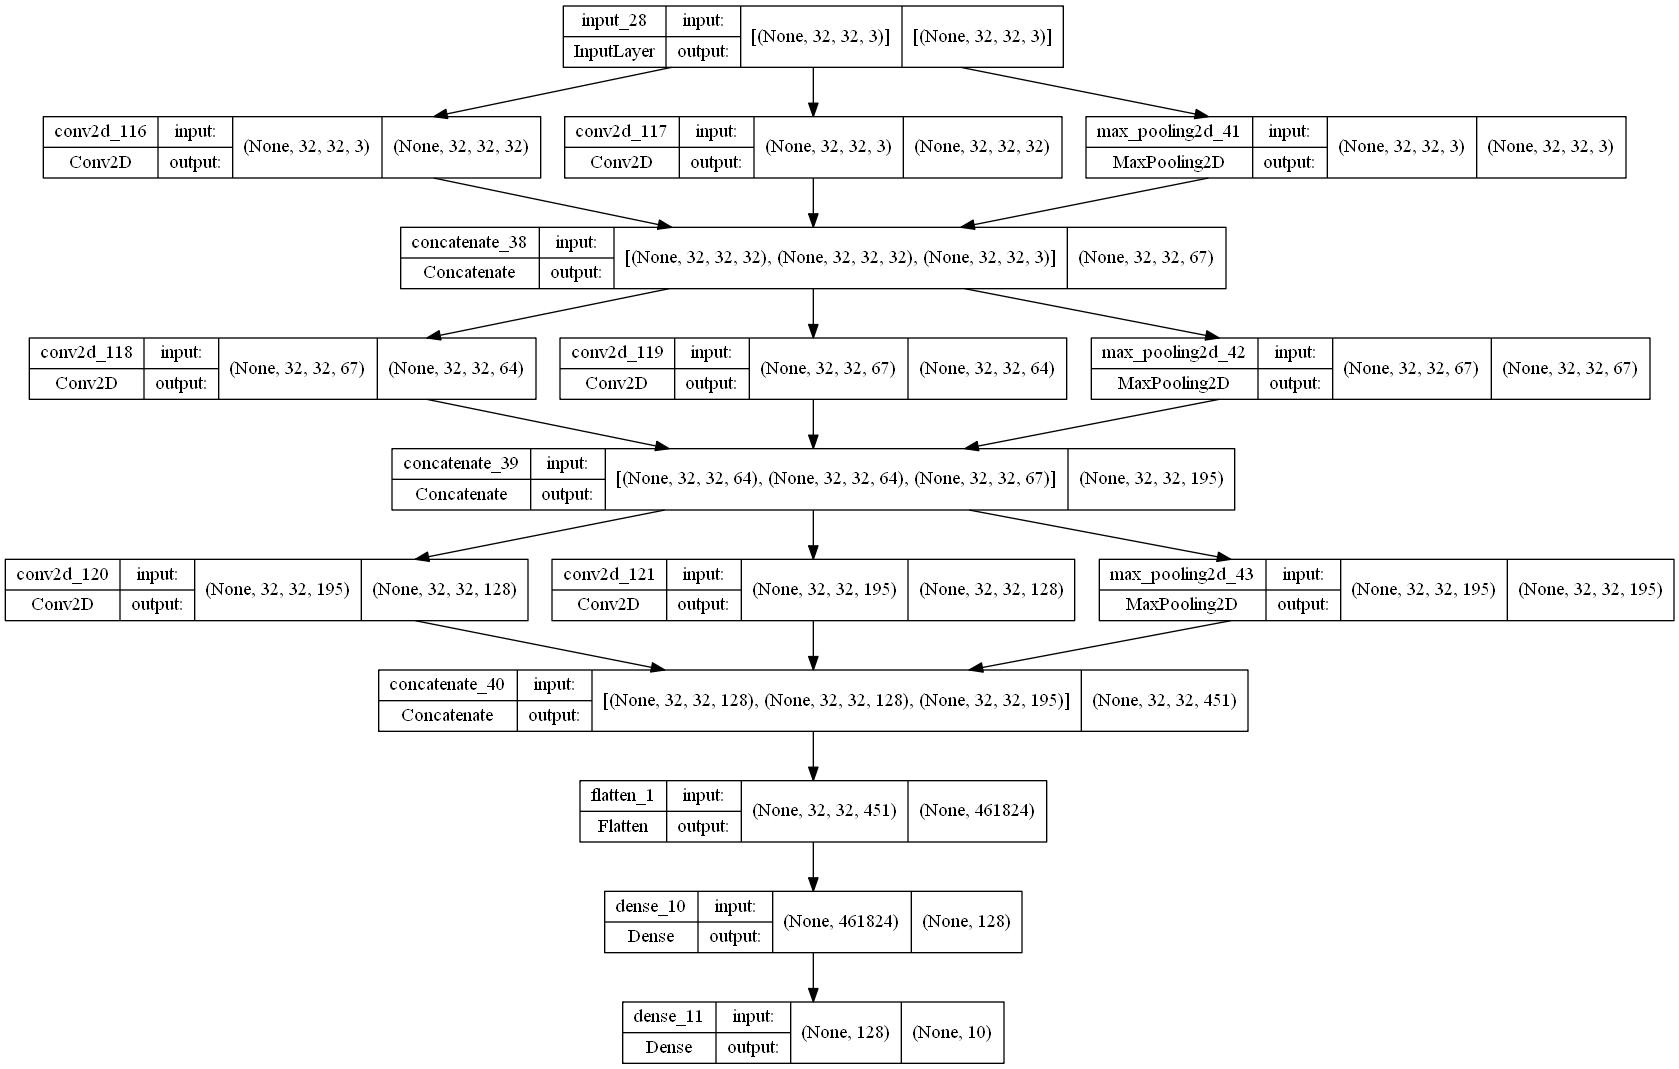

In [146]:
#Plotting model structure
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [71]:
#Defin ing model parameters
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
#Fitting the model to training data
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

In [73]:
#Saving the final model
model.save('final_model.h5')

In [ ]:
# Load the saved model
model = load_model('final_model.h5')

In [119]:
#Model summary, details of layers
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_116 (Conv2D)            (None, 32, 32, 32)   896         ['input_28[0][0]']               
                                                                                                  
 conv2d_117 (Conv2D)            (None, 32, 32, 32)   896         ['input_28[0][0]']               
                                                                                                  
 max_pooling2d_41 (MaxPooling2D  (None, 32, 32, 3)   0           ['input_28[0][0]']               
 )                                                                                          

In [120]:
# Model evaluation
score = model.evaluate(x_test, y_test, verbose= 1)
print("loss: ", score[0])
print("accuracy ", score[1])

313/313 [==============================] - 118s 376ms/step - loss: 1.0035 - accuracy: 0.6508
loss:  1.0035251379013062
accuracy  0.6507999897003174


In [121]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 65.080


#### Model has an accuracy of 65.08%

In [122]:
#Prediction
#Importing libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

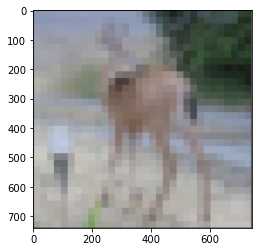

In [123]:
#Loading the sample image
img1 = mpimg.imread('sample.png')
imgplot = plt.imshow(img1)
plt.show()

In [125]:
#Pre-processing the image. (scaling the pixels)
img = load_img('sample.png',  target_size=(32, 32))
#convert to array
img = img_to_array(img)
#reshape into a single sample with 3 channel
img = img.reshape(1, 32, 32, 3)
#prepare pixel data
img = img.astype('float32')
img = img / 255.0

In [126]:
# Load the saved model
model = load_model('final_model.h5')

In [128]:
# predicting the class
result = model.predict(img)
x=np.argmax(result,axis=1)
print(x)

[4]


Data has 10 outputs. 
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

### So in our case, 4 means a deer

### Alternate model

In [ ]:
#2nd model with all the layers in sequence.

In [131]:
#Define the model layers
from keras.models import Sequential

def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [133]:
# define model
model2 = define_model()
# fit model
history = model2.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
# evaluate model
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 72.190


### Model has 72.19% accuracy

In [134]:
#Model summary, details of layers
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 conv2d_135 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_136 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 conv2d_137 (Conv2D)         (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

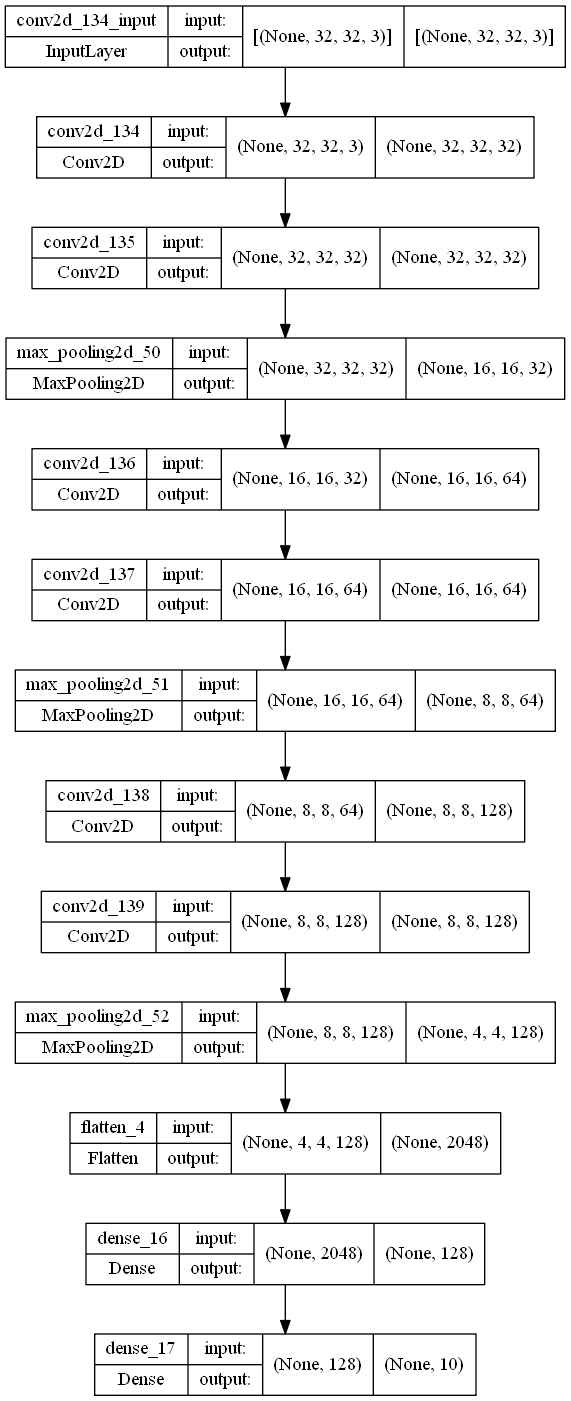

In [145]:
#Plotting model structure
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)

In [138]:
#Saving the final model
model2.save('final_model_2.h5')

In [143]:
# Load the saved model
model2 = load_model('final_model_2.h5')

In [147]:
# predicting the class
result = model2.predict(img)
x=np.argmax(result,axis=1)
print(x)

[4]


### This model also predicts the image as 4, i.e,  Deer